In [1]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [63]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4878,ham,Yeah just open chat and click friend lists. Th...,NaN,NaN,NaN
5221,ham,"Jane babes not goin 2 wrk, feel ill after lst ...",NaN,NaN,NaN
1921,ham,No current and food here. I am alone also,NaN,NaN,NaN
196,ham,Did u got that persons story,NaN,NaN,NaN
1022,ham,We still on for tonight?,NaN,NaN,NaN


In [56]:
df.shape

(5572, 5)

In [57]:
# STEPS 

#1. DATA CLEANING
#2. EDA
#3. TEXT PROCESSING
#4. MODEL BUILDING 
#5. EVALUTION
#6. IMPROVEMENT
#7. WEBSITE
#8. DEPLOY

# 1. DATA CLEANING

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [65]:
# droping unnamed 2,3,4 as many of the values are missing
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.sample(5)

,v1,v2
2412,spam,I don't know u and u don't know me. Send CHAT ...
3372,ham,Looks like you found something to do other tha...
4163,ham,"Its ok, called mom instead have fun"
1270,ham,"Sorry chikku, my cell got some problem thts y ..."
2603,ham,\Im at arestaurant eating squid! i will be out...


In [66]:
# renaming the columns as it's not discriptive
df.rename(columns={'v1' : 'target','v2' : 'text'},inplace = True)
df.sample(5)

,target,text
3407,spam,Do you want a New Nokia 3510i colour phone Del...
4974,ham,Yar... I tot u knew dis would happen long ago ...
5398,ham,Hi. Hope you had a good day. Have a better night.
879,spam,U have a Secret Admirer who is looking 2 make ...
3723,spam,"Hi there, 2nights ur lucky night! Uve been inv..."


In [72]:
# initilizing ham with 0 and spam with 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [74]:
df['target'] = encoder.fit_transform(df['target'])

In [75]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
# cheecking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [77]:
# clecking the duplicated values
df.duplicated().sum()

np.int64(403)

In [78]:
# removing the duplicate values
df = df.drop_duplicates(keep = 'first')

In [79]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.shape

(5169, 2)

# 2. EDA

In [82]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
# it will provide the no of ham and spam in the target column
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

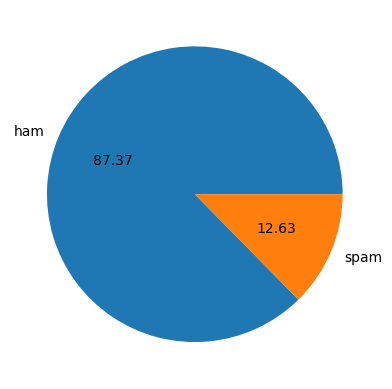

In [86]:
# to see the data in the form of pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct='%0.2f')
plt.show

In [87]:
# data is imbalanced

In [88]:
!pip install nltk

In [89]:
import nltk

In [99]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [100]:
# adding the colloum name num_char to get the no of chra in the single sms 
df['num_characters']=df['text'].apply(len)       

In [101]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [102]:
# getting the words seprated
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [104]:
# getting the count of the words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [105]:
# addding the column to the data set
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [106]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
# getting the coun to of the sentence
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [111]:
# adding the column num_sentences to the data set
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [112]:
df.head()

,target,text,num_characters,num_words,sent_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [113]:
# helps to get all the static calculation behind the columns
df[['num_characters','num_words','sent_count','num_sentences']].describe()

,num_characters,num_words,sent_count,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564,1.965564
std,58.236293,13.324758,1.448541,1.448541
min,2.000000,1.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000,1.000000
50%,60.000000,15.000000,1.000000,1.000000
75%,117.000000,26.000000,2.000000,2.000000
max,910.000000,220.000000,38.000000,38.000000


In [114]:
# describe function for ham messages
df[df['target'] == 0][['num_characters','num_words','sent_count','num_sentences']].describe()

,num_characters,num_words,sent_count,num_sentences
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195,1.820195
std,56.358207,13.493970,1.383657,1.383657
min,2.000000,1.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000,1.000000
50%,52.000000,13.000000,1.000000,1.000000
75%,90.000000,22.000000,2.000000,2.000000
max,910.000000,220.000000,38.000000,38.000000


In [115]:
# describe function for spam messages
df[df['target'] == 1][['num_characters','num_words','sent_count','num_sentences']].describe()

,num_characters,num_words,sent_count,num_sentences
count,653.000000,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904,2.970904
std,30.137753,7.008418,1.488425,1.488425
min,13.000000,2.000000,1.000000,1.000000
25%,132.000000,25.000000,2.000000,2.000000
50%,149.000000,29.000000,3.000000,3.000000
75%,157.000000,32.000000,4.000000,4.000000
max,224.000000,46.000000,9.000000,9.000000


In [116]:
# ploting histogram for both spam and ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

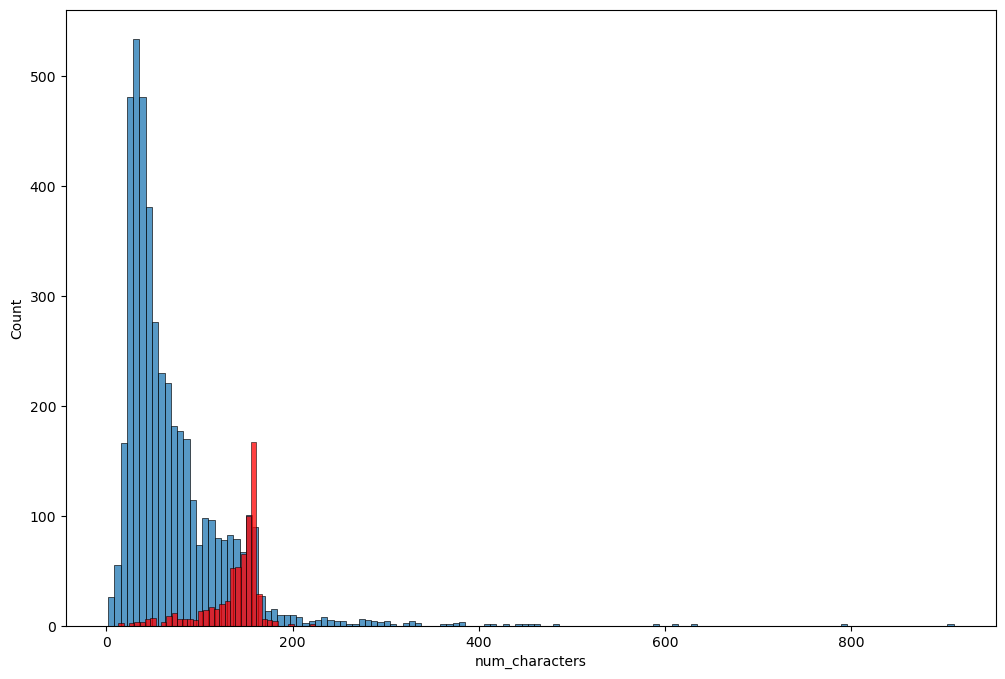

In [127]:
# histogram for spam and ham messages num_characters

plt.figure(figsize=(12,8))                                               # inc. and dec. the size of the histogram
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

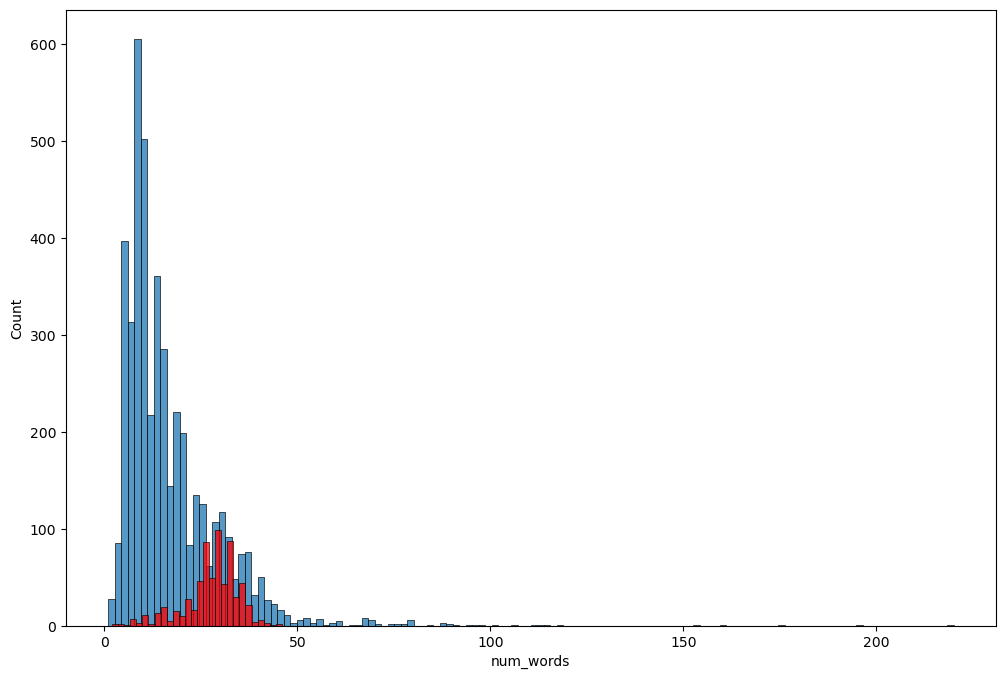

In [128]:
# histogram for spam and ham messages num_words

plt.figure(figsize=(12,8))                                               # inc. and dec. the size of the histogram
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

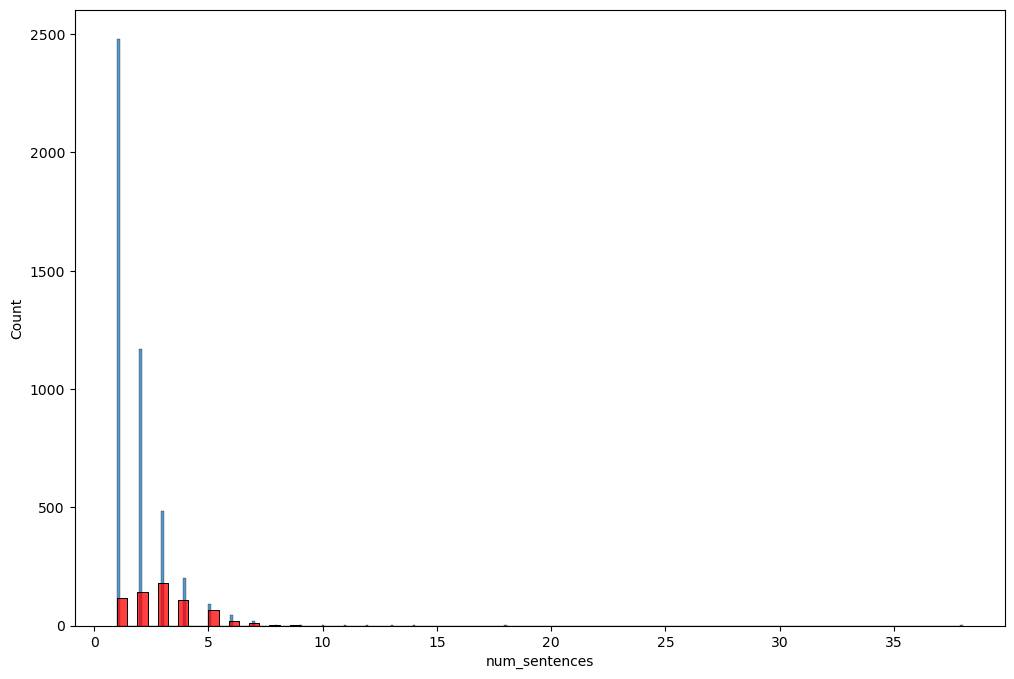

In [131]:
# histogram for spam and ham messages num_sentences

plt.figure(figsize=(12,8))                                               # inc. and dec. the size of the histogram
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

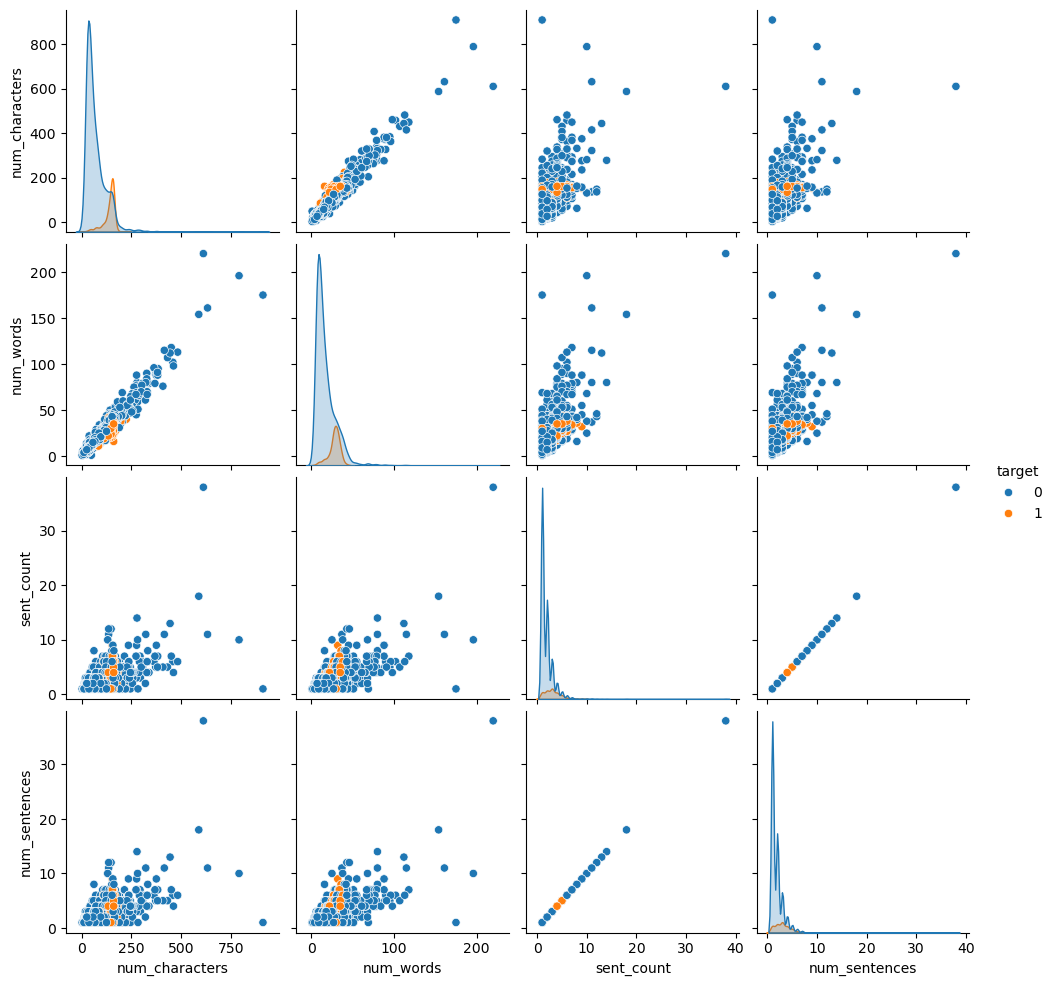

In [132]:
# relationship between the num_words , num_characters and num_sentences
sns.pairplot(df,hue='target')

In [135]:
# getting the co-relation cofficients
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,target,num_characters,num_words,sent_count,num_sentences
target,1.000000,0.384717,0.262912,0.263939,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139,0.624139
num_words,0.262912,0.965760,1.000000,0.679971,0.679971
sent_count,0.263939,0.624139,0.679971,1.000000,1.000000
num_sentences,0.263939,0.624139,0.679971,1.000000,1.000000


<Axes: >

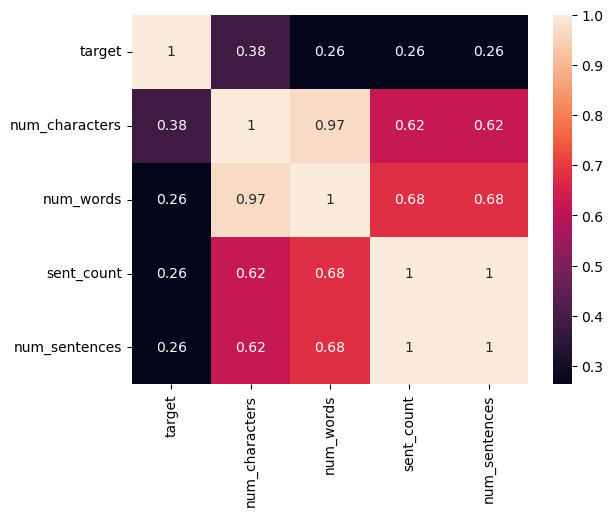

In [137]:
# getting the heatmap of the above given data
sns.heatmap(numeric_df.corr(),annot=True)

# 3. data/text preprocessing

In [ ]:
# data/text preprocessing
        # lower case
        # tokenization
        # removing special characters
        # removing stoping words and puntuations
        # stemming/leminization

In [138]:
# we will give only one function to the data set that will perform all the above text processing steps

In [139]:
def transform_text(text):
    text = text.lower()                                              # changed the data to lower case
    text = nltk.word_tokenize(text)                                  # tokenization done with the help of nltk library


    y = []
    for i in text:
        if i.isalnum():                                              # this will remove special characters by appending alpha and numeric data to y 
            y.append(i)

# steps for removing stoping words and puntuations from data set
    
    text = y[:]                                                      # cloning the data set in text from y as it can't be copied       
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

# step for stemming/lemization

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)      
    

In [141]:
nltk.download('stopwords')                                          # these are all the stopwords which are removed while data preprocessing
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [144]:
import string
punctuation_chars = string.punctuation                                # these are all the stopwords which are removed while data preprocessing
print(punctuation_chars)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [146]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()                                                  # importing PorterStemmer for stemming
ps.stem('loving')

'love'

In [149]:
# now appling the above 139 function to aur data set

df['text'].apply(transform_text)
df['transformed_text'] = df['text'].apply(transform_text)              # adding the transformed_text column to the data set
df.head()

,target,text,num_characters,num_words,sent_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,"[nah, i, do, think, he, goes, to, usf, he, liv..."


In [159]:
# now genrating the word cloud so that we can see the imp words clearly

!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(height = 500,width=500,min_font_size=10,background_color='white')

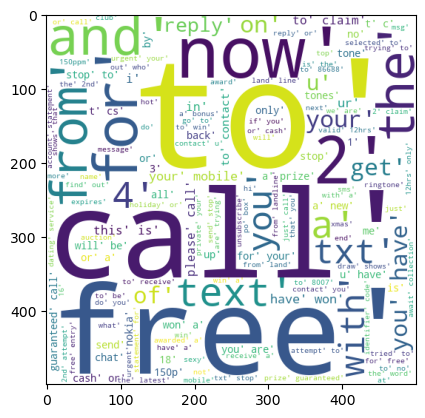

In [166]:
# wordcloud for (spam)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(spam_wc)

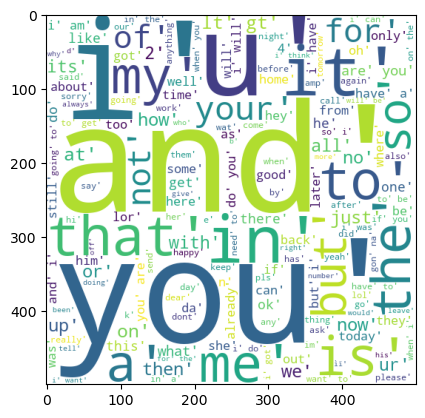

In [168]:
# wordcloud for (ham)
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(ham_wc)

In [169]:
# now to get maximun occuring words on spam and ham so that we can be precised to spam and ham

In [170]:
df.head()

,target,text,num_characters,num_words,sent_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,"[nah, i, do, think, he, goes, to, usf, he, liv..."


In [171]:
df[df['target']==1]                                    # getting all the mails which are spam/1

,target,text,num_characters,num_words,sent_count,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,4,"[freemsg, hey, there, darling, it, been, 3, we..."
8,1,WINNER!! As a valued network customer you have...,158,32,5,5,"[winner, as, a, valued, network, customer, you..."
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,3,"[had, your, mobile, 11, months, or, more, u, r..."
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,3,"[six, chances, to, win, cash, from, 100, to, p..."
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,3,"[want, explicit, sex, in, 30, secs, ring, 0207..."
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,6,"[asked, 3mobile, if, 0870, chatlines, inclu, i..."
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,5,"[had, your, contract, mobile, 11, mnths, lates..."
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,1,"[reminder, from, o2, to, get, pounds, free, ca..."


In [197]:
spam_corpus = []
for msg in df[df['target']==1] ['transformed_text'].tolist():            #changing the spam transformd text to list
    for word in msg:
        spam_corpus.append(word)

In [198]:
len(spam_corpus)

14475

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


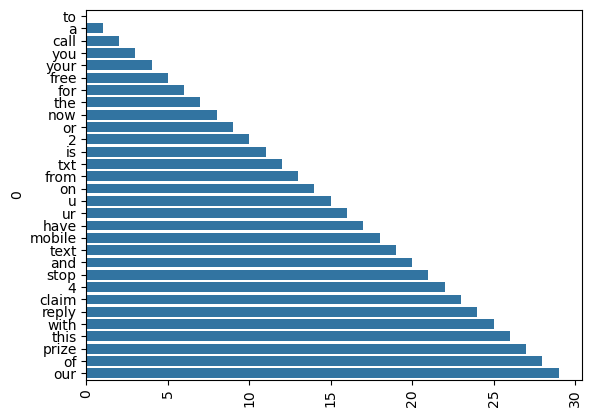

In [199]:
!pip download collections
from collections import Counter                                        # getting top 30 words that are frequently occuring
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]) #(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')        
plt.show()

In [202]:
ham_corpus = []
for msg in df[df['target']==0] ['transformed_text'].tolist():            #changing the ham transformd text to list
    for word in msg:
        ham_corpus.append(word)

In [204]:
len(ham_corpus)

62812

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


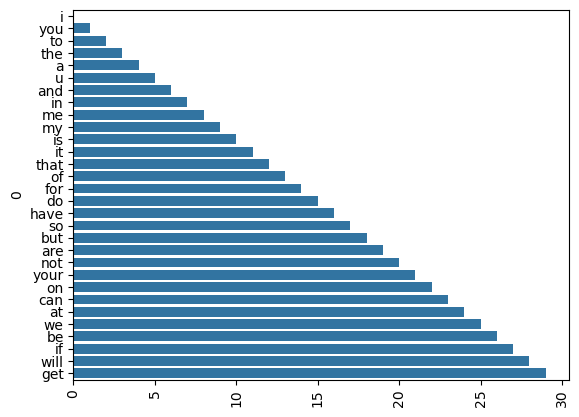

In [206]:
!pip download collections
from collections import Counter                                        # getting top 30 words that are frequently occuring
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]) #(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')       
plt.show()

# 4. model building

In [286]:
# using bag of words(countvectorizer) but it does not gave the good precission hence using tfidf
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [287]:
print(type(df['transformed_text'].iloc[0]))                         # changing first list to string

<class 'str'>


In [288]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: x if isinstance(x, str) else ' '.join(x))    # list to string code
x = tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [289]:
#from sklearn.preprocessing import MinMaxScaler
#Scaler = MinMaxScaler()
#x = Scaler.fit_transform(x)
x.shape

(5169, 3000)

In [290]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [293]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [294]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [295]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[809  87]
 [ 26 112]]
0.5628140703517588


In [296]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))                    # data is imballanced hence accuracy does not matters but the precision should be good
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[896   0]
 [ 32 106]]
1.0


In [297]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)                       
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


# choosing mnb with tfidf as it gives the best precision as per our data 

# 5. model improvement

In [298]:
# 1. change the max_features parameter of the tfidf (here we give the max parameter to take the words from the data 'most occured word'  )
     #(done the changes in 243 line by adding max_feature)
# 2.scaling x in line 255 using min max scaler (in the previous x tere can be values ranging more than 1 hence we apply minmaxscaling)
     #(COMENTING THE SCALING AS IT DECREASES OUR PRECISION FROM 1.0 TO 0.9682)
# 3.voting classifier can also be one of the way in which the different algorithms are merged to get the best outcome
     #(it is also not providing the best outcome hence we drop this idea)
# 4.stacking it is same as voting but here we can have different weightage of the algorithms and we have the final estimator
     #(it is also not providing the best outcome hence we drop this idea)

In [301]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))